# Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

# Adding Assets and pulling historical data


In [23]:
stocks=['AAPL','TSLA','MCD','KO','TMO','MMM','NKE']

eD=dt.datetime.today()
sD=eD-dt.timedelta(2*365)

price=yf.download(stocks,
                  period = '2y')['Adj Close']
returns=price.pct_change().dropna()

[*********************100%***********************]  7 of 7 completed


# Calculate the mean, variance, and correlation matrix for all assets

In [24]:
class Tools:
    def __init__(self,returns, assets):
        self.returns = returns
        self.assets = assets
 
    def simpleComp(self):
        self.tbl=pd.DataFrame(index=self.assets)
        self.tbl['Mean']=returns.mean()*(252*2)
        self.tbl['Variance']=returns.var()*(252*2)
        return(self.tbl.T)
   
    def correlation(self):
        self.tbl=pd.DataFrame(index=self.assets)
        self.corr=returns.corr()
        return(self.corr)

In [25]:
tls=Tools(returns=returns, assets=stocks)
tbl=tls.simpleComp()
corr=tls.correlation()
display(tbl,corr)

,AAPL,TSLA,MCD,KO,TMO,MMM,NKE
Mean,0.350282,0.481463,0.315024,0.235668,0.237818,-0.164267,-0.087212
Variance,0.187332,0.722750,0.063255,0.061980,0.159083,0.106424,0.238386


,AAPL,KO,MCD,MMM,NKE,TMO,TSLA
AAPL,1.000000,0.403624,0.427606,0.357280,0.537390,0.495176,0.548059
KO,0.403624,1.000000,0.597701,0.457170,0.322291,0.297859,0.134213
MCD,0.427606,0.597701,1.000000,0.394211,0.356897,0.314889,0.215345
MMM,0.357280,0.457170,0.394211,1.000000,0.365986,0.229932,0.159198
NKE,0.537390,0.322291,0.356897,0.365986,1.000000,0.438996,0.369343
TMO,0.495176,0.297859,0.314889,0.229932,0.438996,1.000000,0.374639
TSLA,0.548059,0.134213,0.215345,0.159198,0.369343,0.374639,1.000000


# Monte Carlo Simulation to Calculate Efficient Frontier


In [26]:
#portfolio returns
def pRet(weights):
    return np.sum(returns.mean() * weights) * 252
#portfolio volumes
def pVol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252,weights)))

retCol = []
volCol = []
wei =[]

for p in range (15000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    wei.append(weights)
    retCol.append(pRet(weights))
    volCol.append(pVol(weights))

ER = np.array(retCol)
EV = np.array(volCol)
sharpe=(ER-0.02)/EV

# Display Optimals

In [27]:
tbl2=pd.DataFrame(columns=['Expected Return',
                           'Volatility',
                           'Optimal Sharpe Ratio'])
tbl2['Expected Return']=ER
tbl2['Volatility']=EV
tbl2['Optimal Sharpe Ratio']=sharpe

for counter, symbol in enumerate(returns.columns.tolist()):
    tbl2[symbol + "'s weight"] = [w[counter] for w in wei]


tbl2.set_index("Optimal Sharpe Ratio", inplace=True)
portfolios = pd.DataFrame(tbl2)
tbl2F=portfolios.head().T
tbl2F


Optimal Sharpe Ratio,0.492843,0.329561,0.432939,0.405152,0.364331
Expected Return,0.117391,0.098341,0.117740,0.120027,0.097737
Volatility,0.197611,0.237713,0.225759,0.246887,0.213368
AAPL's weight,0.217521,0.047931,0.182015,0.023914,0.114465
KO's weight,0.111929,0.036480,0.203460,0.088819,0.128086
MCD's weight,0.221203,0.197434,0.103229,0.139857,0.179581
MMM's weight,0.095732,0.026048,0.011327,0.159821,0.135199
NKE's weight,0.085578,0.283488,0.194815,0.045004,0.167423
TMO's weight,0.177860,0.240653,0.151100,0.264192,0.111188
TSLA's weight,0.090177,0.167967,0.154054,0.278392,0.164058


# Graph

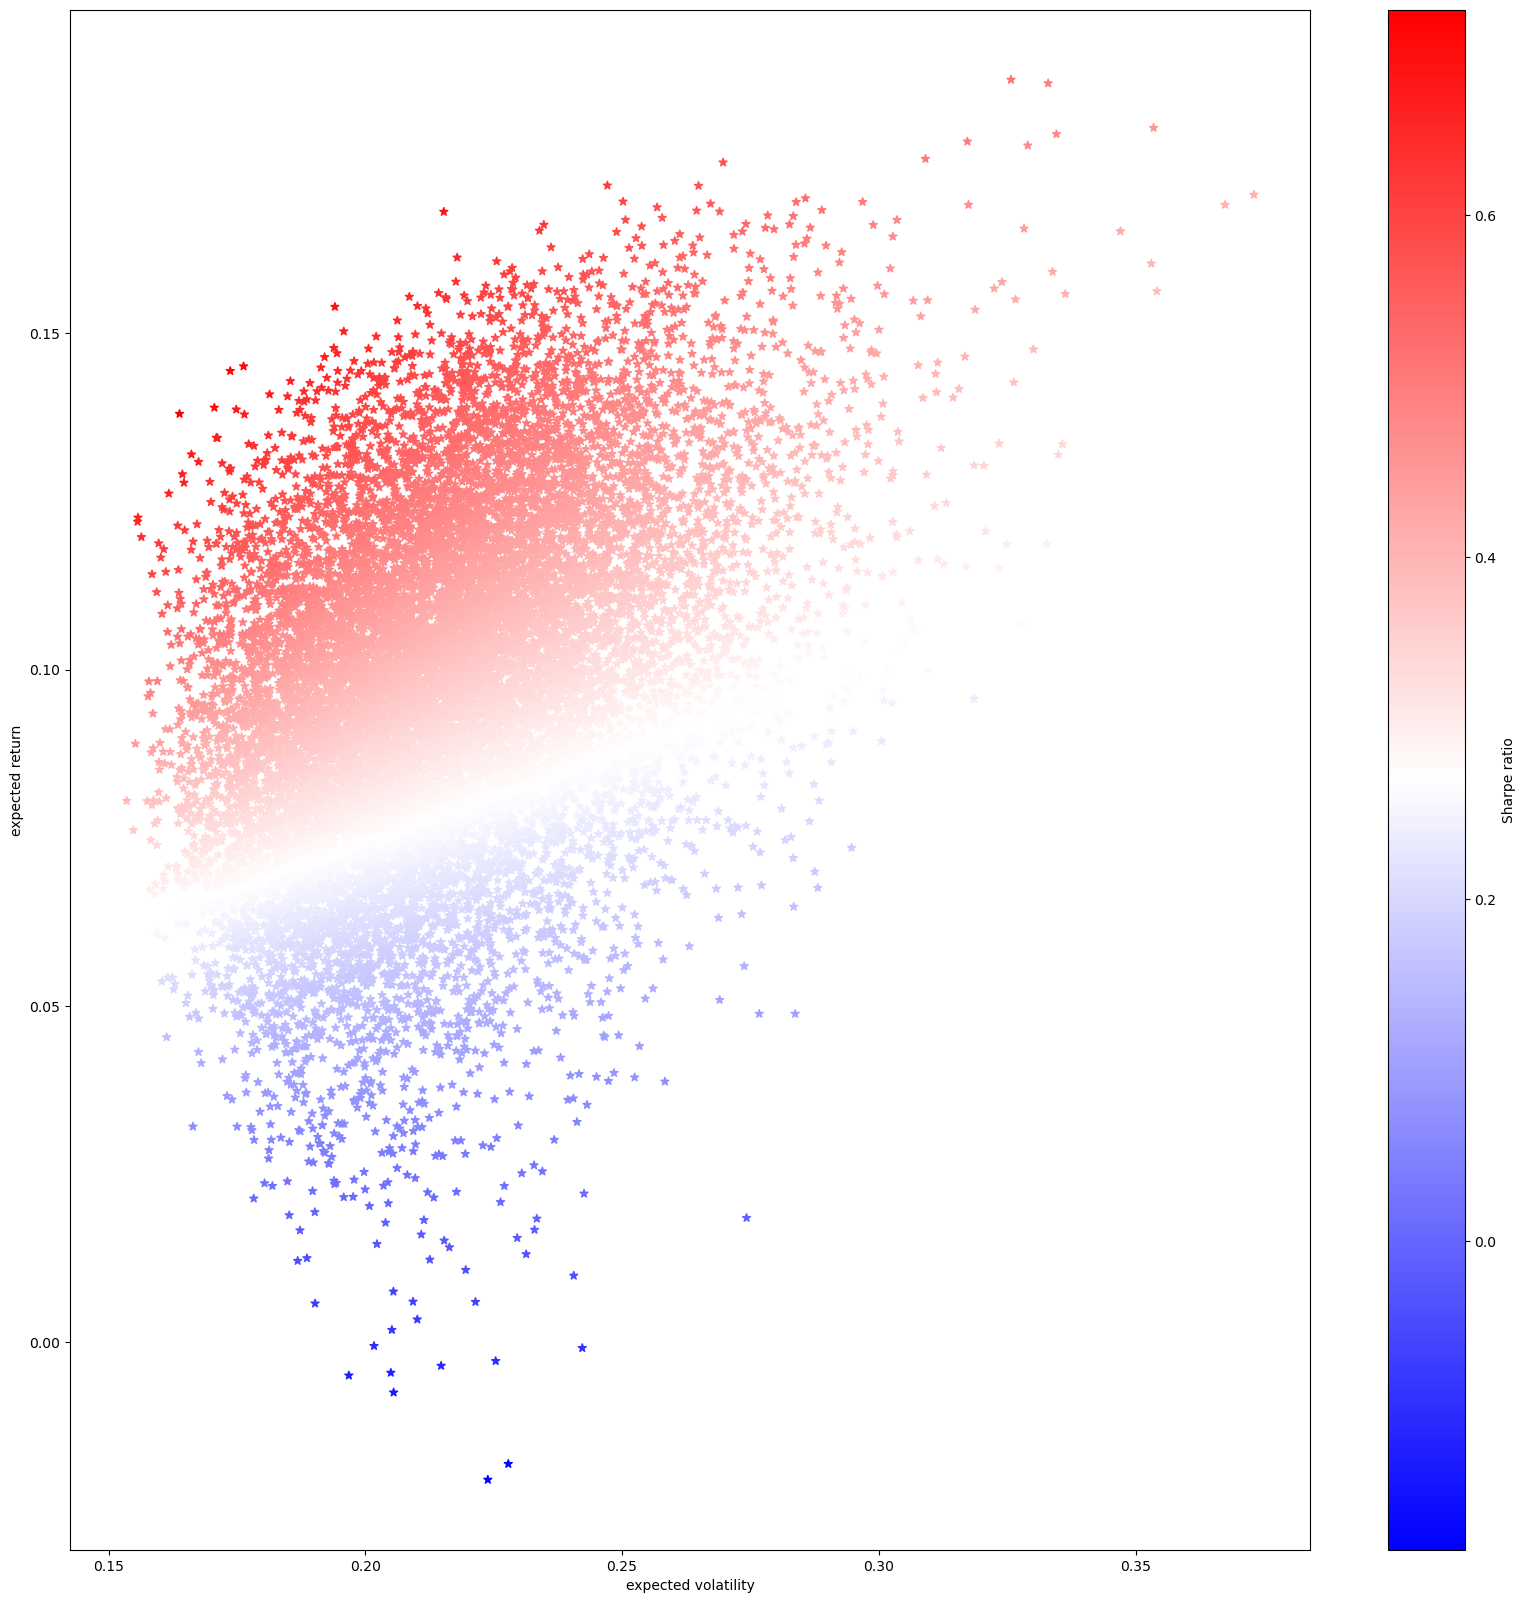

In [32]:
plt.figure(figsize=(20, 20))
plt.scatter(EV, ER, c=sharpe,
marker='*', cmap='bwr')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

# Using Liner Regression to Calculate Efficient Frontier 